# Clustering Text Data

BitTiger DS501

Jun 2017

This assignment uses 'articles.pkl' file that has 1405 articles from 'Arts','Books','Business Day', 'Magazine', 'Opinion', 'Real Estate', 'Sports', 'Travel', 'U.S.', and 'World'. This is a [pickled](https://docs.python.org/2/library/pickle.html) data frame and can be loaded back into a [data frame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html#pandas.read_pickle).  You probably want to eventually get it out of pandas DataFrames when you perform your analysis.

| Section | count|
| :---| :--|
|Arts| 91|
|Automobiles| 5|
|Books| 37|
|Booming| 7|
|Business Day| 100|
|Corrections| 10|
|Crosswords & Games| 2|
|Dining & Wine| 19|
|Education| 4|
|Fashion & Style| 46|
|Great Homes and Destinations| 5|
|Health| 10|
|Home & Garden| 10|
|Magazine| 11|
|Movies| 28|
|N.Y. / Region| 92|
|Opinion| 84|
|Paid Death Notices| 11|
|Real Estate| 13|
|Science| 18|
|Sports| 134|
|Technology| 13|
|Theater| 16|
|Travel| 9|
|U.S.| 88|
|World | 131|
|Your Money | 6 |

1. Use pandas' `pd.read_pickle()`. to load data to DataFrame. Apply kmeans clustering to the `articles.pkl`.

2. To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" article or the average occurances of words for that cluster.

3. But for topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

    * Sort each centroid vector to find the top 10 features
    * Go back to your vectorizer object to find out what words each of these features corresponds to.

4. Look at the docs for `TfidfVectorizer` and see if you can limit the number of features (words) included in the feature matrix.  This can help reduce some noise and make the centroids slightly more sensible.  Limit the `max_features` and see if the words of the topics change at all.

5. An alternative to finding out what each cluster represents is to look at the articles that are assigned to it.  Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

6. What 'topics' has kmeans discovered? Can you try to assign a name to each?  Do the topics change as you change k (just try this for a few different values of k)?

7. If you set k == to the number of NYT sections in the dataset, does it return topics that map to a section?  Why or why not?

8. Try your clustering only with a subset of the original sections.  Do the topics change or get more specific if you only use 3 sections (i.e. Sports, Art, and Business)?  Are there any cross section topics (i.e. a Sports article that talks about the economics of a baseball team) you can find? 

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

## K-Means

#### Load data from articles.pkl to DataFrame

In [2]:
import numpy as np
import pandas as pd

In [3]:
articles_df = pd.read_pickle("data/articles.pkl")

In [4]:
articles_df.head(2)

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...


In [5]:
print articles_df.section_name.unique()
print len(articles_df.section_name.unique())

[u'Sports' u'U.S.' u'Business Day' u'World' u'Opinion' u'Arts' u'Travel'
 u'Magazine' u'Real Estate' u'Books']
10


#### Vectorize the article content as tf-idf

In [31]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmizer(doc, tokenizer, stemmer):
    return [stemmer.stem(token) for token in tokenizer.tokenize(doc)]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', tokenizer = lambda x: lemmizer(x, tokenizer,stemmer),max_features = 1000)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()

In [33]:
features

[u'abl',
 u'accept',
 u'access',
 u'accord',
 u'account',
 u'accus',
 u'acknowledg',
 u'act',
 u'action',
 u'activ',
 u'activist',
 u'actual',
 u'ad',
 u'addit',
 u'address',
 u'administr',
 u'advanc',
 u'advertis',
 u'afford',
 u'age',
 u'agenc',
 u'agent',
 u'ago',
 u'agre',
 u'agreement',
 u'ahead',
 u'aid',
 u'aim',
 u'air',
 u'al',
 u'alli',
 u'allow',
 u'alon',
 u'alreadi',
 u'alway',
 u'america',
 u'american',
 u'analyst',
 u'angel',
 u'announc',
 u'annual',
 u'anoth',
 u'answer',
 u'anyth',
 u'appeal',
 u'appear',
 u'approach',
 u'approv',
 u'april',
 u'area',
 u'argu',
 u'arm',
 u'armi',
 u'arrest',
 u'arriv',
 u'art',
 u'articl',
 u'artist',
 u'ask',
 u'assembl',
 u'assist',
 u'associ',
 u'athlet',
 u'attack',
 u'attempt',
 u'attend',
 u'attent',
 u'attract',
 u'audienc',
 u'august',
 u'author',
 u'avail',
 u'averag',
 u'award',
 u'away',
 u'b',
 u'bad',
 u'ball',
 u'ballet',
 u'ban',
 u'band',
 u'bank',
 u'base',
 u'basebal',
 u'battl',
 u'bay',
 u'beat',
 u'becam',
 u'becom

#### Apply k-means clustering to the vectors

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 1)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Inspect the centroids

In [35]:
print "cluster centers:"
print kmeans.cluster_centers_

cluster centers:
[[ 0.00615391  0.00435027  0.00672888 ...,  0.01626861  0.00639585
   0.00168719]
 [ 0.00838381  0.00429558  0.00169266 ...,  0.01363721  0.01170865
   0.00211798]
 [ 0.00263752  0.00476573  0.00233298 ...,  0.02755011  0.01365936
   0.00281818]
 ..., 
 [ 0.00474758  0.00726764  0.00811615 ...,  0.01805626  0.00707243
   0.00230813]
 [ 0.00815803  0.00327617  0.         ...,  0.00502135  0.01494514
   0.00100283]
 [ 0.00406428  0.00468177  0.00368072 ...,  0.01204058  0.00963856
   0.02933249]]


In [36]:
print("let look at labels")
print(kmeans.labels_)
print(np.unique(kmeans.labels_))

let look at labels
[6 3 7 ..., 4 0 0]
[0 1 2 3 4 5 6 7 8 9]


#### Find the top 10 features for each cluster.

In [38]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

top features for each cluster:
0: said, s, peopl, year, compani, mr, new, attack, offici, state
1: team, s, game, season, said, player, cup, play, leagu, race
2: s, mr, music, ms, art, work, new, perform, m, like
3: republican, health, senat, hous, govern, care, s, shutdown, mr, obama
4: syria, chemic, syrian, weapon, unit, resolut, council, s, nation, secur
5: iran, rouhani, iranian, nuclear, mr, s, obama, israel, unit, presid
6: yard, giant, touchdown, game, quarterback, team, s, season, jet, offens
7: court, mr, judg, s, said, case, state, sentenc, prison, law
8: yanke, game, rivera, inning, season, pitch, run, pettitt, hit, s
9: mr, s, parti, govern, percent, said, bank, polit, countri, elect


#### Limit the number of features and see if the words of the topics change.

In [39]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()

In [40]:
kmeans = KMeans(n_clusters = 10, random_state = 1)
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster with 1000 max features:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

top features for each cluster with 1000 max features:
0: said, attack, syria, official, killed, police, people, government, united, security
1: republican, house, government, senate, health, care, mr, obama, shutdown, law
2: cup, race, team, said, club, won, world, year, victory, america
3: game, season, team, said, player, yard, coach, league, play, touchdown
4: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, nation
5: yankee, game, rivera, inning, season, run, hit, said, team, league
6: new, sept, year, said, company, people, million, like, york, world
7: mr, music, ms, art, work, song, new, like, dance, said
8: mr, said, state, court, year, china, government, percent, bank, judge
9: party, mr, government, election, political, said, minister, democrat, ms, europe


#### Print out the titles of a random sample of the articles assigned to each cluster to get a sense of the topic.

In [42]:
kmeans.transform(X)

array([[ 1.0740234 ,  1.14106048,  1.02417961, ...,  1.04140721,
         1.03742547,  1.12727713],
       [ 1.0357432 ,  0.88695942,  1.11695922, ...,  1.06303275,
         1.0313599 ,  1.10439933],
       [ 1.06019604,  1.10760134,  1.04160176, ...,  1.06464188,
         0.98705014,  1.07294764],
       ..., 
       [ 0.78397344,  1.0933273 ,  1.09558134, ...,  1.02656975,
         0.96856171,  1.05175599],
       [ 0.95476398,  1.04692282,  1.03641987, ...,  0.90565271,
         0.89636935,  1.01902832],
       [ 0.99109658,  0.90624989,  1.03294605, ...,  0.96046917,
         0.94502071,  1.00243767]])

In [41]:
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print(assigned_cluster)

[3 1 8 ..., 0 6 1]


In [43]:
kmeans.predict(X)

array([3, 1, 8, ..., 0, 6, 1])

In [44]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for article in sample_articles:
        print(articles_df.ix[article,'section_name'])
        print(articles_df.ix[article,'headline'])

cluster 0:
U.S.
Illinois: 2 Men Are Charged in Chicago Shooting
World
Amid Violence, Returning to Elections in Sri Lanka After a Void
Opinion
Why Nairobi
cluster 1:
Opinion
Health Exchanges, Open for Business
Opinion
The Right Gets Its ’60s
U.S.
In Showdown With G.O.P., a Scrappy Reid Plays Hardball
cluster 2:
Sports
Neymar Scores as Barcelona Stays Perfect in League Play
Sports
New IndyCar Race at the Brickyard
Sports
In FIFA Politics, Blatter Is the Consummate Player
cluster 3:
Sports
Nets, Before Taking a Shot, Share a Kumbaya Moment at Training Camp
Sports
49ers on Edge of Falling Apart or Snapping Back
Sports
Islanders Bring N.H.L. to Brooklyn, but Preview Gets Mixed Reviews
cluster 4:
World
Iran’s New President Preaches Tolerance in First U.N. Appearance
World
Iran’s President Responds to Netanyahu
Opinion
President Rouhani Comes to Town
cluster 5:
Sports
When Rivera Started, and Pettitte Relieved
Sports
With a Win, the Ending to Pettitte’s Illustrious Career Is Complete
Sports
P

G:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


#### If you set `k==` to the number of NYT sections in the dataset, does it return topics that map to a section?

In [45]:
from collections import Counter

In [46]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)

In [47]:
print "top 2 topics for each cluster"
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
#     print(most_common)
    print "Cluster %d: %s" % (i, most_common[0][0]),
    if len(most_common) > 1:
        print ", %s" % (most_common[1][0]),
    print

top 2 topics for each cluster
Cluster 0: World , Opinion
Cluster 1: World , U.S.
Cluster 2: Sports
Cluster 3: Arts , Business Day
Cluster 4: Sports , Arts
Cluster 5: World , Arts
Cluster 6: World
Cluster 7: Arts , Opinion
Cluster 8: U.S. , Business Day
Cluster 9: World , Business Day


#### Try clustering with a subset of the sections.


In [48]:
# Create masks
cond_sports = articles_df['section_name']=='Sports'
cond_arts = articles_df['section_name']=='Arts'
cond_business_day = articles_df['section_name']=='Business Day'

In [49]:
three_articles_df = articles_df[cond_sports | cond_arts | cond_business_day]

In [50]:
three_articles_df

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
4,article,http://www.nytimes.com/2013/10/03/sports/tenni...,"Rafael Nadal, aiming to end Novak Djokovic’s r...",None,"Rafael Nadal, aiming to end Novak Djokovic’s r...",Sports,49,The New York Times,Sports,Tennis,524cf28b38f0d8198973ff73,2013-10-03T00:00:00Z,14,Nadal on Track for No. 1 Spot,rafael nadal aiming end novak djokovic’s run 1...
5,article,http://www.nytimes.com/2013/10/03/sports/socce...,A Brazilian labor judge ordered the suspension...,None,A Brazilian labor judge ordered the suspension...,Sports,49,The New York Times,Sports,Soccer,524ced7138f0d8198973ff67,2013-10-03T00:00:00Z,14,Judge Halts Work on World Cup Stadium,brazilian labor judge ordered suspension const...
6,article,http://www.nytimes.com/2013/10/03/sports/socce...,Defending champion Bayern Munich produced a po...,"Bayern Munich beats Manchester City, 3-1, in U...",Defending champion Bayern Munich produced a po...,Sports,190,The New York Times,Sports,Soccer,524ce87638f0d8198973ff59,2013-10-03T00:00:00Z,14,Bayern Munich Dominates Manchester City,defending champion bayern munich produced powe...
7,article,http://www.nytimes.com/2013/10/03/sports/ameri...,Simone Biles used superb floor and vault exerc...,American Simone Biles sweeps past teammate Kyl...,Simone Biles used superb floor and vault exerc...,Sports,49,The New York Times,Sports,None,524cebfb38f0d8198973ff5f,2013-10-03T00:00:00Z,14,American Leads in World Gymnastics All-Around,simone bile used superb floor vault exercise s...
8,article,http://www.nytimes.com/2013/10/03/sports/hocke...,The Devils announced that Cory Schneider would...,New Jersey Devils announce that Cory Schneider...,The Devils announced that Cory Schneider would...,Sports,110,The New York Times,Sports,Hockey,524ceb0338f0d8198973ff5c,2013-10-03T00:00:00Z,14,Brodeur’s Starting Streak to End,the devil announced cory schneider would start...
9,article,http://www.nytimes.com/2013/10/03/sports/vonn-...,Lindsey Vonn’s surgically repaired right knee ...,Lindsey Vonn announces that her surgically rep...,Lindsey Vonn’s surgically repaired right knee ...,Sports,61,The New York Times,Sports,None,524ce70738f0d8198973ff58,2013-10-03T00:00:00Z,14,Vonn Is Close to Returning,lindsey vonn’s surgically repaired right knee ...
10,article,http://www.nytimes.com/2013/10/03/sports/whitn...,The Whitney Handicap winner Cross Traffic will...,Whitney Handicap winner Cross Traffic will not...,The Whitney Handicap winner Cross Traffic will...,Sports,37,The New York Times,Sports,None,524ce3b538f0d8198973ff53,2013-10-03T00:00:00Z,14,Whitney Winner Out of Breeders’ Cup Classic,the whitney handicap winner cross traffic run ...
12,article,http://www.nytimes.com/2013/10/03/business/ene...,"Clean Energy Fuels is selling Redeem, a vehicl...","Clean Energy Fuels is selling Redeem, vehicle ...","Clean Energy Fuels is selling Redeem, a vehicl...",Business,743,The New York Times,Business Day,Energy & Environment,524ccb1738f0d8198973ff11,2013-10-03T00:00:00Z,9,Fuel From Landfill Methane Goes on Sale,farmer waste management company energy industr...
21,article,http://www.nytimes.com/2013/10/03/sports/hocke...,After years of financial troubles nearly cause...,"Phoenix Coyotes, following years of financial ...",After years of financial troubles nearly cause...,Sports,1194,The New York Times,Sports,Hockey,524cc19a38f0d8198973fef1,2013-10-03T00:00:00Z,15,"Finally Secure in the Desert, the Coyotes Devo...",glendale ariz. just three month ago phoenix co...


In [51]:
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)

In [52]:
print "top 2 topics for each cluster"
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.ix[cluster,'section_name'].dropna()
    most_common = Counter(topics).most_common()
    print "Cluster %d: %s" % (i, most_common[0][0]),
    if len(most_common) > 1:
        print " %s" % (most_common[1][0]),
    print

top 2 topics for each cluster
Cluster 0: Sports  Business Day
Cluster 1: Sports  Business Day
Cluster 2: Sports  Arts


G:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## Hierarchical Clustering

We have been introduced to distance metrics and the idea of similarity, but we will take a deeper dive here. For many machine learning algorithms, the idea of 'distance' between two points is a crucial abstraction to perform analysis. For Kmeans we are usually limited to use Euclidean distance even though our domain might have a more approprite distance function (i.e. Cosine similarity for text).  With Hierarchical clustering we will not be limited in this way.   
We already have our bags and played around with Kmeans clustering.  Now we are going to leverage [Scipy](http://www.scipy.org/) to perform [hierarchical clustering](http://en.wikipedia.org/wiki/Hierarchical_clustering).

1. Hierarchical clustering is more computationally intensive than Kmeans.  Also it is hard to visualize the results of a hierarchical clustering if you have too much data (since it represents its clusters as a tree). Create a subset of the original articles by filtering the data set to contain at least one article from each section and at most around 100 total articles.

    One issue with text (especially when visualzing/clustering) is high dimensionality.  Any method that uses distance metrics is susceptible to the [curse of dimensionality](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/). `scikit-learn` has some utility to do some feature selection for us on our bags.  

2. The first step to using `scipy's` Hierarchical clustering is to first find out how similar our vectors are to one another.  To do this we use the `pdist` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) to compute a similarity matrix of our data (pairwise distances).  First we will just use Euclidean distance.  Examine the shape of what is returned.

3. A quirk of `pdist` is that it returns one looong vector.  Use scipy's [squareform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html) function to get our long vector of distances back into a square matrix.  Look at the shape of this new matrix.

4. Now that we have a square similarity matrix we can start to cluster!  Pass this matrix into scipy's `linkage` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) to compute our hierarchical clusters.

5. We in theory have all the information about our clusters but it is basically impossible to interpret in a sensible manner.  Thankfully scipy also has a function to visualize this madness.  Using scipy's `dendrogram` [function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) plot the linkages as a hierachical tree.

#### Create a subset of the original articles by filtering the data set to contain at least one article from each section and at most 100 total articles.

In [ ]:
# small_mask = np.zeros(len(articles_df)).astype(bool)
# indices = np.arange(len(articles_df))
# for category in articles_df['section_name'].unique():
#     category_mask = (articles_df['section_name'] == category).values
#     new_index = np.random.choice(indices[category_mask])
#     small_mask[new_index] = True
# additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
#                                       100 - sum(small_mask),
#                                       replace=False)
# small_mask[additional_indices] = True
# small_df = articles_df.ix[small_mask]

In [53]:
# extract about 100 observations with same distribution as original 
n = 100
section_ratio = (articles_df["section_name"].value_counts(normalize = True, ascending = True) * n + 1).round().astype(int)

In [55]:
small_mask = np.zeros(len(articles_df)).astype(bool)
index = np.arange(len(articles_df))
for sec in section_ratio.index:
    sec_mask = (articles_df["section_name"] == sec).values
    # print(index[sec_mask])
    # print(section_ratio[sec])
    new_index = np.random.choice(index[sec_mask], size = section_ratio[sec], replace = False)
    small_mask[new_index] = True

In [56]:
small_df = articles_df[small_mask]

In [57]:
small_df.reset_index(drop = True, inplace = True)

In [58]:
# Verify that this is good:
# assert len(small_df) == 100
assert len(small_df['section_name'].unique()) == len(articles_df['section_name'].unique())

#### First vectorize our articles

In [59]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

#### Before using scipy's Hierarchical clustering, we need to first find out how similar our vectors are to one another.

In [60]:
from scipy.spatial.distance import pdist, squareform

In [61]:
# now get pairwise distances
distxy = squareform(pdist(small_X.todense(), metric='cosine'))

In [62]:
distxy

array([[ 0.        ,  0.97685924,  1.        , ...,  0.95877327,
         0.99620501,  0.99735948],
       [ 0.97685924,  0.        ,  0.97896031, ...,  0.97465607,
         0.93575605,  0.93254662],
       [ 1.        ,  0.97896031,  0.        , ...,  0.96128935,
         0.99009073,  0.96158443],
       ..., 
       [ 0.95877327,  0.97465607,  0.96128935, ...,  0.        ,
         0.96822285,  0.95140462],
       [ 0.99620501,  0.93575605,  0.99009073, ...,  0.96822285,
         0.        ,  0.91527044],
       [ 0.99735948,  0.93254662,  0.96158443, ...,  0.95140462,
         0.91527044,  0.        ]])

#### Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

In [63]:
from scipy.cluster.hierarchy import linkage

In [64]:
link = linkage(distxy, method='complete')

G:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


#### Using scipy's dendrogram function plot the linkages as a hierachical tree.

In [65]:
from scipy.cluster.hierarchy import dendrogram

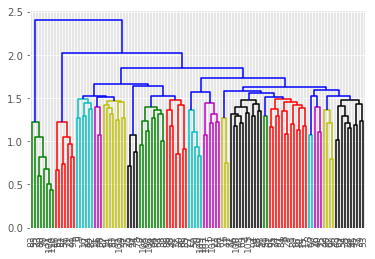

In [66]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9)
plt.show()

## Hierarchical Topics

##### To make your clusters more interpretable, change the labels on the data to be the titles of the articles.


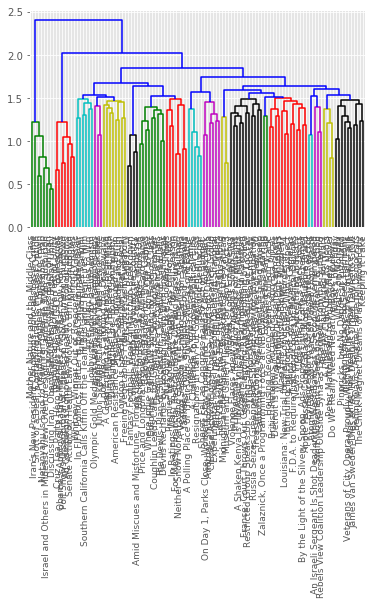

In [67]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=small_df['headline'].values)

#### Label each point with the title and the section.


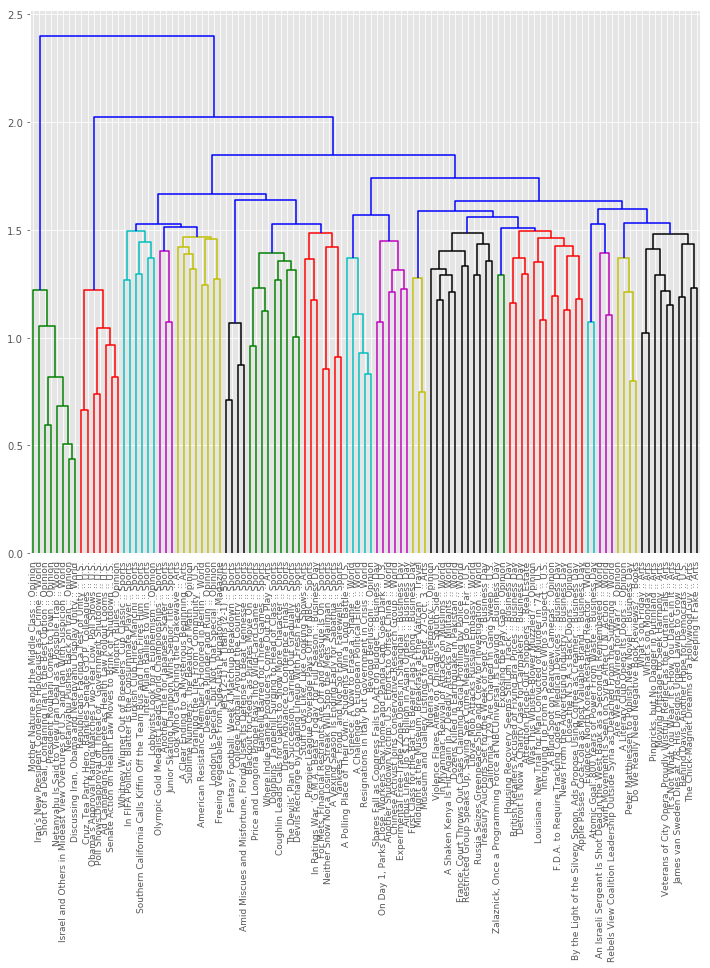

In [69]:
fig, ax = plt.subplots(1, figsize=(12, 10))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels)

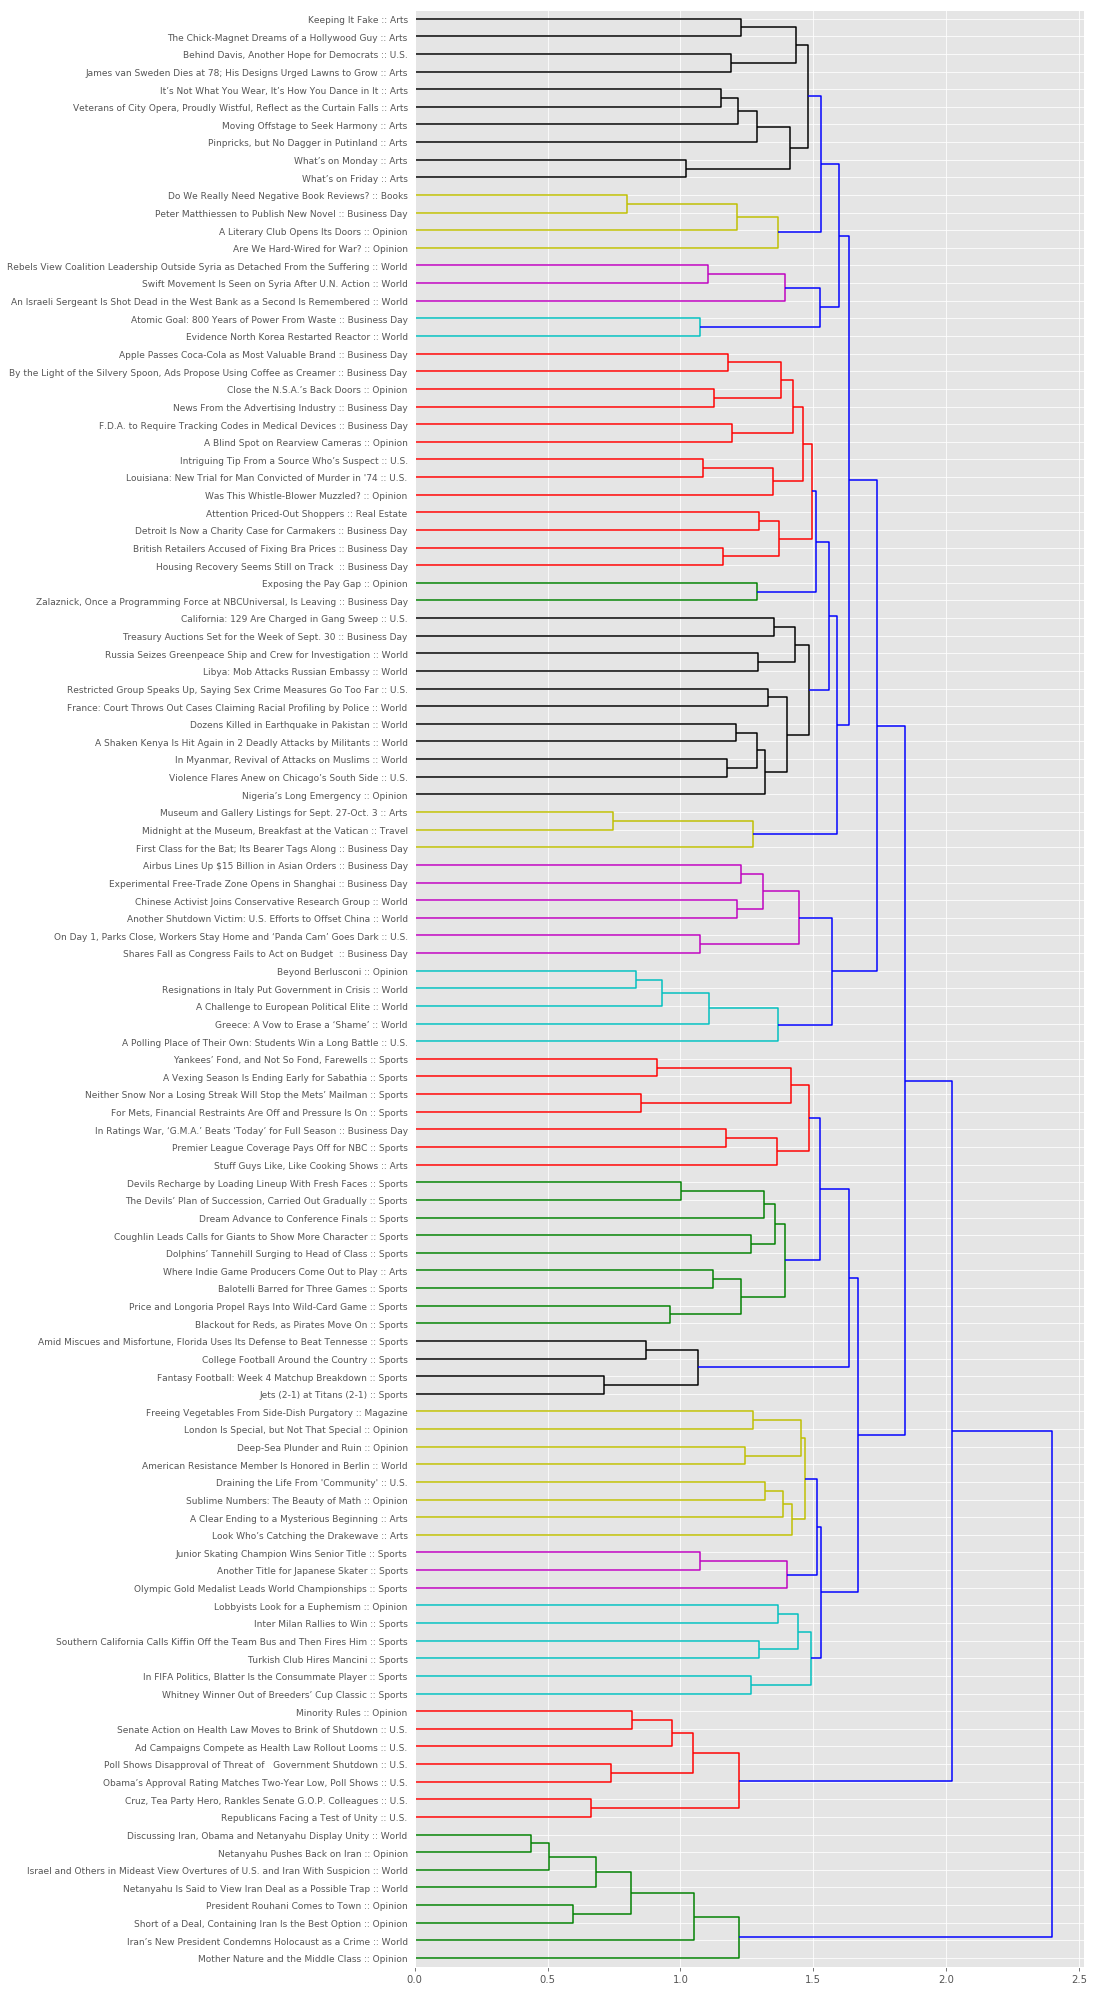

In [70]:
fig, ax = plt.subplots(1, figsize=(12, 36))

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels, orientation='right')

#### Explore different clusters on a per section basis.


In [71]:
def plot_dendrogram_by_categorty(articles_df, category, n_articles=20):
    mask = articles_df['section_name'] == category
    cat_df = articles_df[mask].sample(n=n_articles)
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))
    fig, ax = plt.subplots(1, figsize=(6, 6))
    
    labels = cat_df['headline'].values
    # labels = (cat_df['headline'] + ' :: ' + cat_df['subsection_name']).values
    
    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=8,
                        labels=labels,
                        orientation='right')
    ax.set_title(category)

G:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


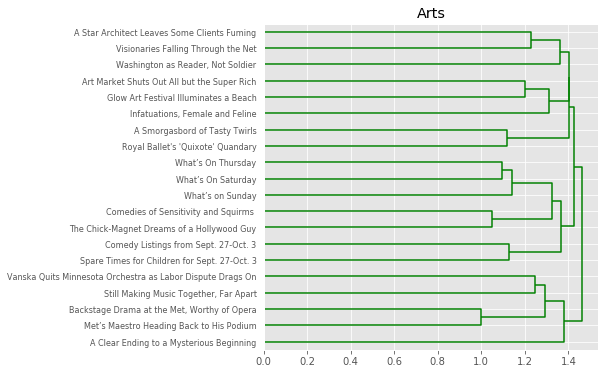

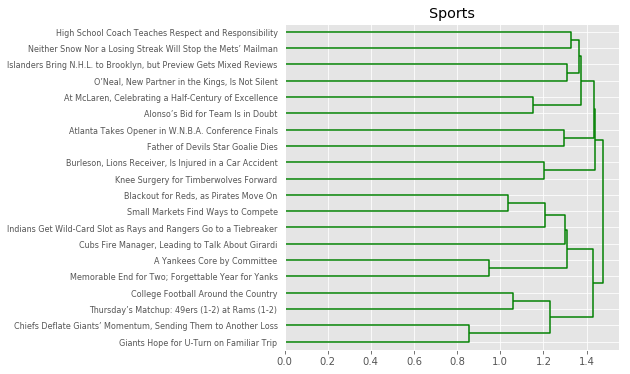

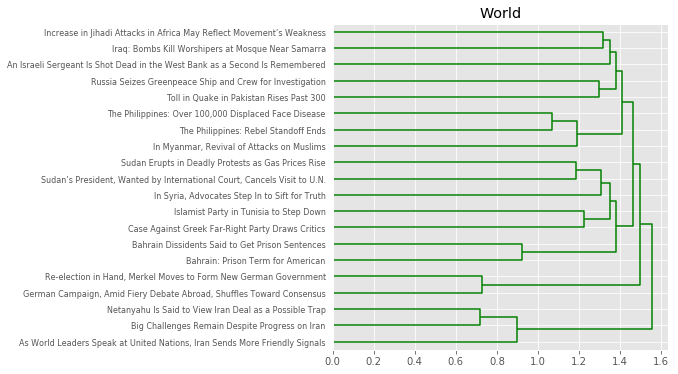

In [72]:
for category in ['Arts', 'Sports', 'World']:
    plot_dendrogram_by_categorty(articles_df, category)

##### Perform the same analysis as above and inspect the dendrogram with the words from the articles.


G:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  app.launch_new_instance()


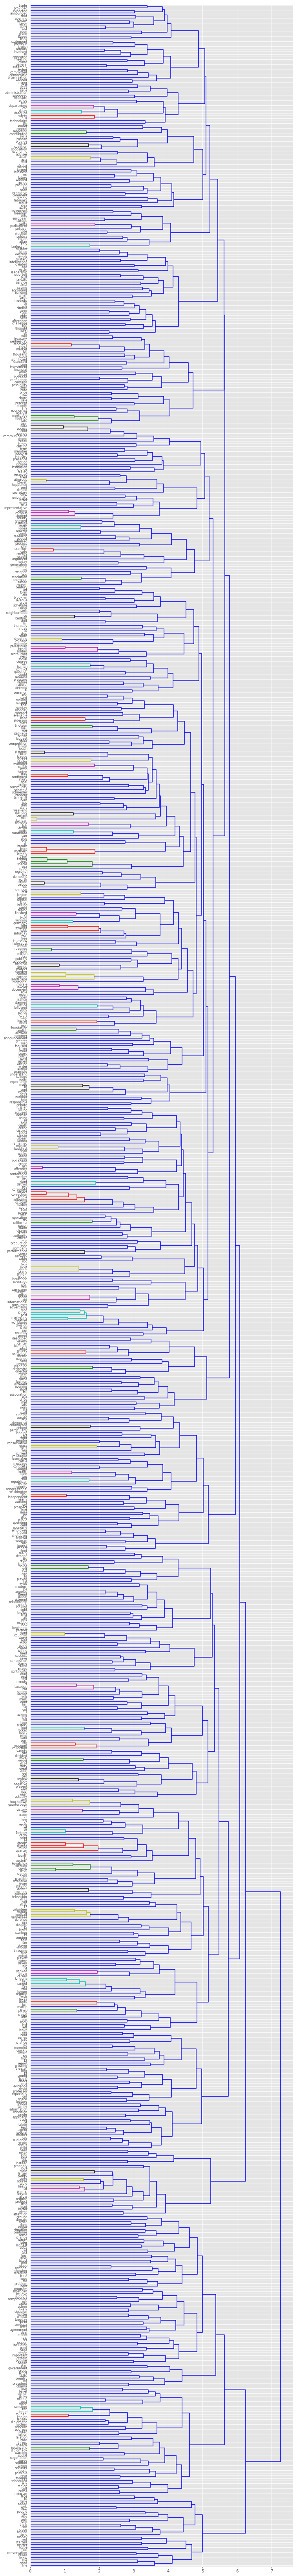

In [73]:
plt.figure(figsize=(12, 120))
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=2, leaf_font_size=8,
                    labels=small_features, orientation='right')